In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro


In [2]:
df = pd.read_csv('train.csv')

data = df.iloc[6000:8000]
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 6000 to 7999
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               2000 non-null   int64  
 1   mean_atomic_mass                 2000 non-null   float64
 2   wtd_mean_atomic_mass             2000 non-null   float64
 3   gmean_atomic_mass                2000 non-null   float64
 4   wtd_gmean_atomic_mass            2000 non-null   float64
 5   entropy_atomic_mass              2000 non-null   float64
 6   wtd_entropy_atomic_mass          2000 non-null   float64
 7   range_atomic_mass                2000 non-null   float64
 8   wtd_range_atomic_mass            2000 non-null   float64
 9   std_atomic_mass                  2000 non-null   float64
 10  wtd_std_atomic_mass              2000 non-null   float64
 11  mean_fie                         2000 non-null   float64
 12  wtd_mean_fie     

In [3]:
data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
6000,5,79.171174,56.319470,59.994943,37.301656,1.389953,1.420484,122.90607,16.190122,50.424957,...,2.124153,2.168944,2.103257,1.594167,1.316352,1,0.969150,0.4,0.329757,72.0
6001,5,79.171174,52.618691,59.994943,35.195970,1.389953,1.439262,122.90607,14.817418,50.424957,...,2.085803,2.168944,2.070805,1.594167,1.287311,1,1.001560,0.4,0.280074,72.0
6002,5,79.171174,52.261535,59.994943,35.047191,1.389953,1.445192,122.90607,14.672553,50.424957,...,2.081967,2.168944,2.067587,1.594167,1.291224,1,0.992974,0.4,0.274315,74.0
6003,5,79.171174,51.764114,59.994943,34.793066,1.389953,1.450864,122.90607,14.470934,50.424957,...,2.077821,2.168944,2.064114,1.594167,1.292133,1,0.988327,0.4,0.267890,76.0
6004,5,79.171174,51.297188,59.994943,34.687152,1.389953,1.458503,122.90607,14.281295,50.424957,...,2.070644,2.168944,2.058115,1.594167,1.300990,1,0.963893,0.4,0.256229,73.0


In [4]:
data.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.075000,87.460172,60.714734,66.466126,40.698406,1.401185,1.341070,148.166161,23.816082,53.643312,...,2.228124,2.356747,2.170440,1.567925,1.289899,1.72200,0.978236,0.691820,0.509231,55.863625
std,0.898765,12.424800,14.116511,8.949352,12.805311,0.182889,0.196940,31.144961,10.938032,11.125568,...,0.224412,0.231868,0.163453,0.174242,0.160657,1.07717,0.175754,0.405794,0.359368,30.913958
min,3.000000,24.732576,16.882521,12.157891,7.231416,0.667967,0.509778,47.546600,2.084877,16.396668,...,1.868966,1.681793,1.659829,0.848686,0.796312,0.00000,0.275000,0.000000,0.000000,0.100000
25%,4.750000,76.517718,52.013599,59.994943,35.049702,1.250496,1.263161,122.906070,15.694263,44.289459,...,2.077519,2.168944,2.063748,1.419284,1.203843,1.00000,0.906015,0.433013,0.268264,27.000000
50%,5.000000,88.330322,56.794862,66.568307,36.158544,1.432995,1.359310,134.360600,20.825477,51.968828,...,2.112365,2.329986,2.088282,1.589027,1.270796,1.00000,1.019835,0.489898,0.372500,59.000000
75%,6.000000,94.818312,60.699083,71.174942,37.053552,1.534148,1.451330,188.383900,29.235793,62.782821,...,2.307143,2.491462,2.253348,1.694415,1.374054,2.00000,1.064000,0.920820,0.675484,81.025000
max,8.000000,149.050333,130.358132,145.690031,127.154804,1.874194,1.817992,200.259000,82.357050,79.336376,...,3.571429,4.160168,3.451230,2.016833,1.866174,5.00000,2.425000,2.357023,1.928473,135.700000


In [5]:
  data.isnull().sum()


number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [6]:
rows_with_nulls = data.isnull().any(axis=1).sum()
print(f"Number of rows with at least one null value: {rows_with_nulls}")

Number of rows with at least one null value: 0


In [7]:
df_cleaned = data.dropna()
rows_with_nulls = df_cleaned.isnull().any(axis=1).sum()
print(f"Number of rows with at least one null value: {rows_with_nulls}")

Number of rows with at least one null value: 0


In [8]:
# Extract the target variable
y = df_cleaned['critical_temp']

# Drop the column with the target variable and any irrelevant columns
X = df_cleaned.drop(['critical_temp'], axis=1)



# Convert all features to float64 (if necessary)
X = X.astype('float64')

# Display information about the preprocessed features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 6000 to 7999
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               2000 non-null   float64
 1   mean_atomic_mass                 2000 non-null   float64
 2   wtd_mean_atomic_mass             2000 non-null   float64
 3   gmean_atomic_mass                2000 non-null   float64
 4   wtd_gmean_atomic_mass            2000 non-null   float64
 5   entropy_atomic_mass              2000 non-null   float64
 6   wtd_entropy_atomic_mass          2000 non-null   float64
 7   range_atomic_mass                2000 non-null   float64
 8   wtd_range_atomic_mass            2000 non-null   float64
 9   std_atomic_mass                  2000 non-null   float64
 10  wtd_std_atomic_mass              2000 non-null   float64
 11  mean_fie                         2000 non-null   float64
 12  wtd_mean_fie     

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
 

In [10]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
 

LinearRegression()

Mean Squared Error (Test): 351.37664868987855
R-squared(Test): 0.618720748259143
Mean Squared Error (Train): 316.6280725449546
R-squared(Train): 0.6734375217052635


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


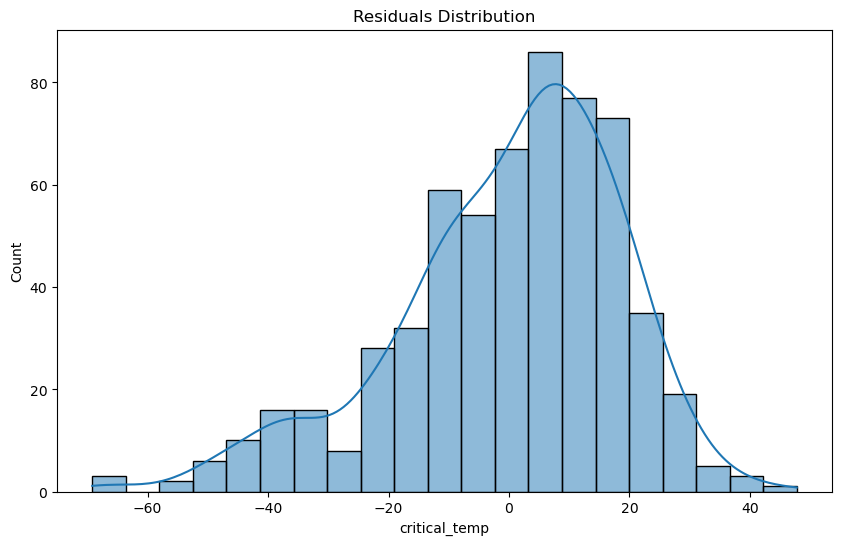

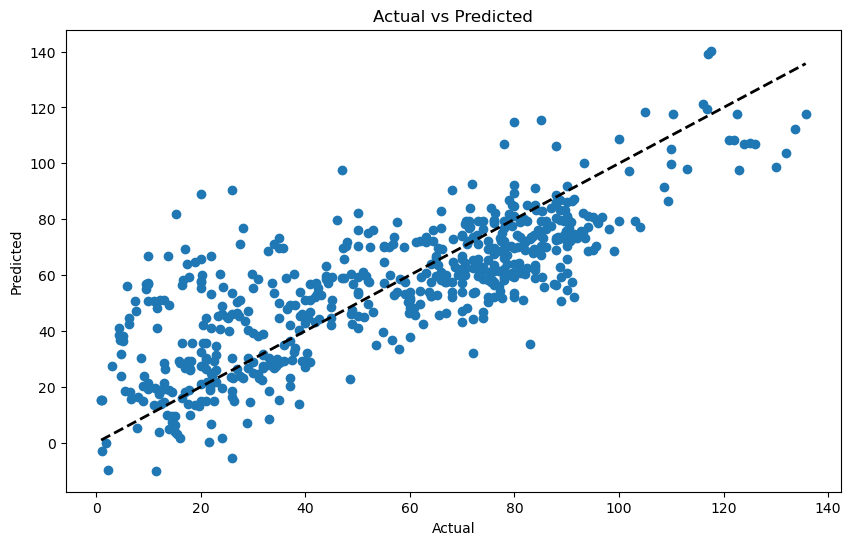

In [11]:

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_tr = model.predict(X_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
mse_tr = mean_squared_error(y_train, y_pred_tr)
r2_tr = r2_score(y_train, y_pred_tr)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Test): {mse}')
print(f'R-squared(Test): {r2}')
print(f'Mean Squared Error (Train): {mse_tr}')
print(f'R-squared(Train): {r2_tr}')
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [12]:
rs_test_l = []
rs_tr_l = []
mse_tr_l = []
mse_test_l = []

# Confirm the variables are lists before appending
print(f'Type of rs_test: {type(rs_test_l)}')
print(f'Type of rs_tr: {type(rs_tr_l)}')
print(f'Type of mse_tr: {type(mse_tr_l)}')
print(f'Type of mse_test: {type(mse_test_l)}')

rs_test_l.append(r2)
rs_tr_l.append(r2_tr)
mse_tr_l.append(mse_tr)
mse_test_l.append(mse)

Type of rs_test: <class 'list'>
Type of rs_tr: <class 'list'>
Type of mse_tr: <class 'list'>
Type of mse_test: <class 'list'>


In [13]:
# Print model summary
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.38
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:07:18   Log-Likelihood:                -8600.9
No. Observations:                2000   AIC:                         1.737e+04
Df Residuals:                    1918   BIC:                         1.783e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Assupmtions

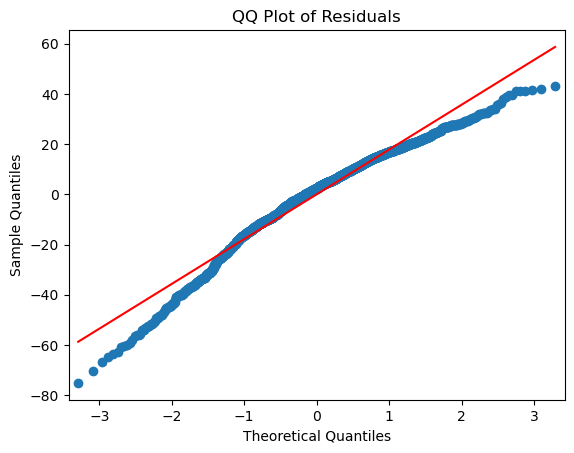

Durbin-Watson Test: 1.023907245261567
Breusch-Pagan Test p-value: 1.2226448799616134e-15
Shapiro-Wilk Test: ShapiroResult(statistic=0.9647728800773621, pvalue=1.1079325988936835e-21)


In [14]:
# Normality check
qqplot(model_sm.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()
# Independence check
dw_test = durbin_watson(model_sm.resid)
print('Durbin-Watson Test:', dw_test)
# Homoscedasticity check
_, pval, __, f_pval = het_breuschpagan(model_sm.resid, model_sm.model.exog)
print('Breusch-Pagan Test p-value:', pval)
shapiro_test = shapiro(model_sm.resid)
print('Shapiro-Wilk Test:', shapiro_test)


In [15]:
# Calculate studentized residuals
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
influence = model_sm.get_influence()
studentized_residuals = influence.resid_studentized_external

# Detect outliers
outliers = np.abs(studentized_residuals) > 2
data_no_outliers = df_cleaned[~outliers]

# Re-fit linear regression model without outliers
# Define new features and target variable without outliers
X_no_outliers = data_no_outliers.drop(['critical_temp'], axis=1)
y_no_outliers = data_no_outliers['critical_temp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=17)

# Fit the linear regression model on the training set
lm_no_outliers = LinearRegression()
lm_no_outliers.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = lm_no_outliers.predict(X_test)
y_pred_tr = lm_no_outliers.predict(X_train)
# Optionally, you can print out performance metrics such as R-squared, MAE, MSE, etc.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Calculate metrics for training data
r2_train = r2_score(y_train, y_pred_tr)
mae_train = mean_absolute_error(y_train, y_pred_tr)
mse_train = mean_squared_error(y_train, y_pred_tr)

# Print results
print(f'R-squared: (Test) {r2_test}')
print(f'Mean Absolute Error: (Test) {mae_test}')
print(f'Mean Squared Error: (Test) {mse_test}')
print(f'R-squared: (Train) {r2_train}')
print(f'Mean Absolute Error: (Train) {mae_train}')
print(f'Mean Squared Error: (Train) {mse_train}')




# For statsmodels summary without outliers
X_train_sm = sm.add_constant(X_train)
model_sm_no_outliers = sm.OLS(y_train, X_train_sm).fit()
print(model_sm_no_outliers.summary())


R-squared: (Test) 0.754086151619656
Mean Absolute Error: (Test) 12.15096279256925
Mean Squared Error: (Test) 238.42614824584535
R-squared: (Train) 0.7743040451576659
Mean Absolute Error: (Train) 11.501998948267545
Mean Squared Error: (Train) 200.8280702695918
                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     52.56
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        04:08:09   Log-Likelihood:                -5384.8
No. Observations:                1323   AIC:                         1.093e+04
Df Residuals:                    1241   BIC:                         1.136e+04
Df Model:                          81                                         
Covariance Type:            n

In [16]:

rs_test_l.append(r2_test)
rs_tr_l.append(r2_train)
mse_tr_l.append(mse_train)
mse_test_l.append(mse_test)

## Ridge Regression


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)


In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best alpha from RidgeCV: 1.2067926406393288


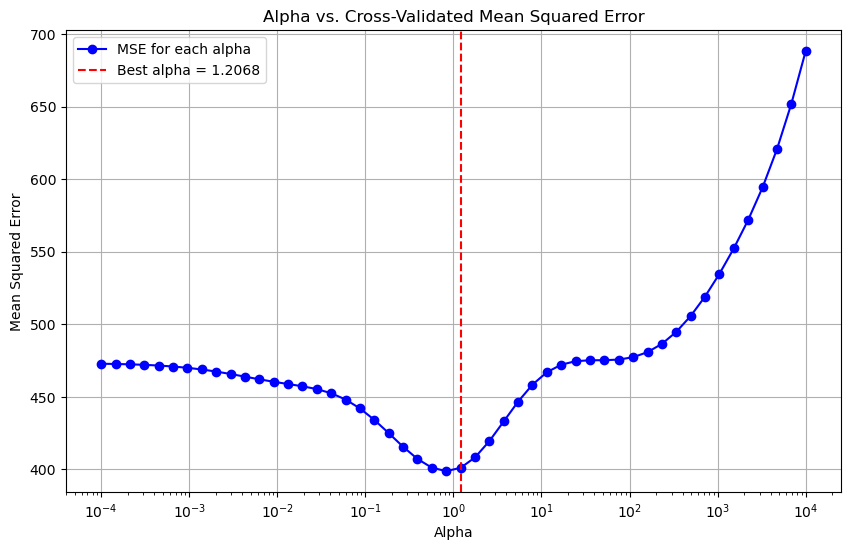

Mean Squared Error with best alpha: 363.99447979201216


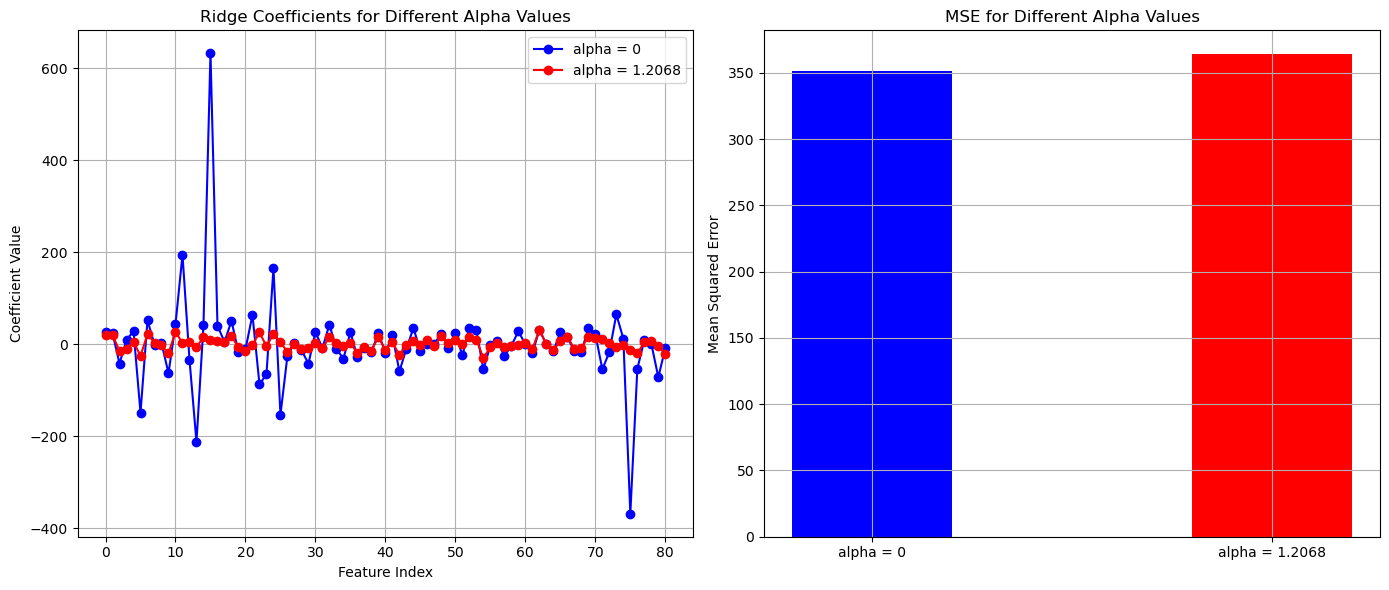

In [19]:
# Initialize and fit RidgeCV to find the best alpha
alphas = np.logspace(-4, 4, 50)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Print the best alpha
best_alpha = ridgecv.alpha_
print(f"Best alpha from RidgeCV: {best_alpha}")

# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha', color='blue')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Fit Ridge regression with the best alpha from RidgeCV
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)
pred_best = ridge_best.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, pred_best)
print(f'Mean Squared Error with best alpha: {mse_best}')

# Plot the coefficients
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ridge1 = Ridge(alpha=0)
ridge1.fit(X_train_scaled, y_train)
plt.plot(ridge1.coef_, marker='o', label='alpha = 0', color='blue')

plt.plot(ridge_best.coef_, marker='o', label=f'alpha = {best_alpha:.4f}', color='red')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)

# Plot the MSE
mse_values = [mean_squared_error(y_test, ridge1.predict(X_test_scaled)), mse_best]
alpha_labels = ['alpha = 0', f'alpha = {best_alpha:.4f}']

plt.subplot(1, 2, 2)
plt.bar(alpha_labels, mse_values, width=0.4, color=['blue', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Alpha Values')
plt.grid(True)

plt.tight_layout()
plt.show()



In [20]:
# Predictions and MSE for training set
pred_best_tr = ridge_best.predict(X_train_scaled)
mse_best_tr = mean_squared_error(y_train, pred_best_tr)
r2_best_tr = r2_score(y_train, pred_best_tr)

# Predictions and MSE for testing set
pred_best = ridge_best.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

# Print coefficients and errors for the best alpha model
print("\nRidge Regression with best alpha from RidgeCV coefficients:")
print(pd.Series(ridge_best.coef_, index=X.columns))
print(f"Train Mean Squared Error for best alpha ({best_alpha}): {mse_best_tr}")
print(f"Train R-squared for best alpha ({best_alpha}): {r2_best_tr}")
print(f"Test Mean Squared Error for best alpha ({best_alpha}): {mse_best}")
print(f"Test R-squared for best alpha ({best_alpha}): {r2_best}")


Ridge Regression with best alpha from RidgeCV coefficients:
number_of_elements       19.508041
mean_atomic_mass         20.186606
wtd_mean_atomic_mass    -14.326261
gmean_atomic_mass        -9.291469
wtd_gmean_atomic_mass     5.862316
                           ...    
wtd_entropy_Valence     -19.092622
range_Valence             4.060545
wtd_range_Valence         7.609581
std_Valence              -3.243864
wtd_std_Valence         -19.913897
Length: 81, dtype: float64
Train Mean Squared Error for best alpha (1.2067926406393288): 336.3163526427069
Train R-squared for best alpha (1.2067926406393288): 0.6531315093848615
Test Mean Squared Error for best alpha (1.2067926406393288): 363.99447979201216
Test R-squared for best alpha (1.2067926406393288): 0.605029123561965


In [21]:
rs_test_l.append(r2_best)
rs_tr_l.append(r2_best_tr)
mse_tr_l.append(mse_best_tr)
mse_test_l.append(mse_best)

## LASSO 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11366.766368696815, tolerance: 10693.682745854278
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14797.681813971023, tolerance: 10693.682745854278
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45855.46588737273, tolerance: 10693.682745854278
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:61

Best alpha from LassoCV: 0.019306977288832496


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+05, tolerance: 1.069e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+05, tolerance: 1.083e+04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+05, toleranc

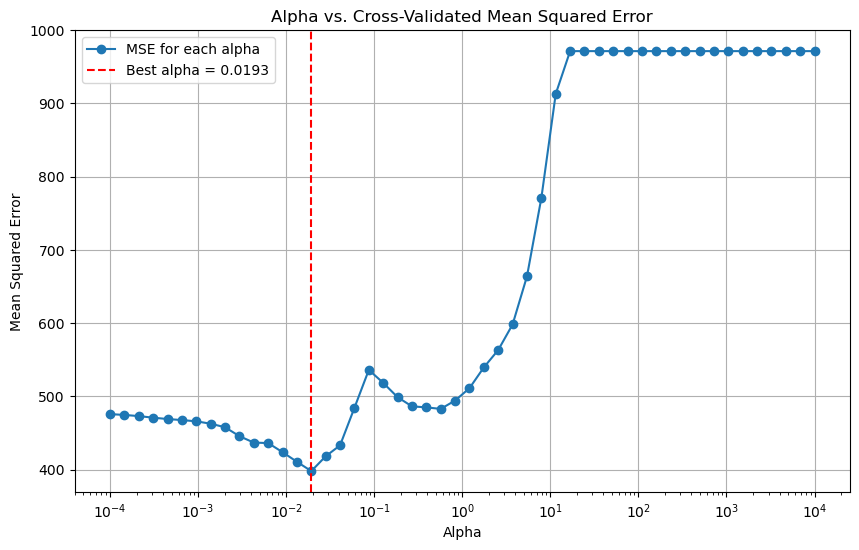


Lasso Regression with best alpha from LassoCV coefficients:
number_of_elements       20.477728
mean_atomic_mass         13.022902
wtd_mean_atomic_mass     -5.874161
gmean_atomic_mass        -4.742182
wtd_gmean_atomic_mass     0.000000
                           ...    
wtd_entropy_Valence     -16.892067
range_Valence             4.820028
wtd_range_Valence         7.748734
std_Valence               0.000000
wtd_std_Valence         -19.740216
Length: 81, dtype: float64
Train Mean Squared Error for best alpha (0.019306977288832496): 339.90076183623495
Train R-squared for best alpha (0.019306977288832496): 0.6494346370890711
Test Mean Squared Error for best alpha (0.019306977288832496): 367.44895217621206
Test R-squared for best alpha (0.019306977288832496): 0.6012806711513734


In [22]:
# Initialize and fit LassoCV to find the best alpha
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit LassoCV to find the best alpha
alphas = np.logspace(-4, 4, 50)
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=30000, tol=0.01)
lassocv.fit(X_train_scaled, y_train)

# Print the best alpha
best_alpha = lassocv.alpha_
print(f"Best alpha from LassoCV: {best_alpha}")

# Calculate the cross-validated MSE for each alpha
mse_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=30000, tol=0.01)
    scores = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plot the alphas against their respective MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', label='MSE for each alpha')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Alpha vs. Cross-Validated Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Fit Lasso regression with the best alpha from LassoCV
lasso_best = Lasso(alpha=best_alpha, max_iter=50000, tol=0.01)
lasso_best.fit(X_train_scaled, y_train)

# Predictions and MSE for training set
pred_best_tr = lasso_best.predict(X_train_scaled)
mse_best_tr = mean_squared_error(y_train, pred_best_tr)
r2_best_tr = r2_score(y_train, pred_best_tr)

# Predictions and MSE for testing set
pred_best = lasso_best.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

# Print coefficients and errors for the best alpha model
print("\nLasso Regression with best alpha from LassoCV coefficients:")
print(pd.Series(lasso_best.coef_, index=X.columns))
print(f"Train Mean Squared Error for best alpha ({best_alpha}): {mse_best_tr}")
print(f"Train R-squared for best alpha ({best_alpha}): {r2_best_tr}")
print(f"Test Mean Squared Error for best alpha ({best_alpha}): {mse_best}")
print(f"Test R-squared for best alpha ({best_alpha}): {r2_best}")

C:\Users\Pc Planet\AppData\Local\Temp\ipykernel_18688\1866813656.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso1.fit(X_train_scaled, y_train)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.342e+05, tolerance: 1.357e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_de

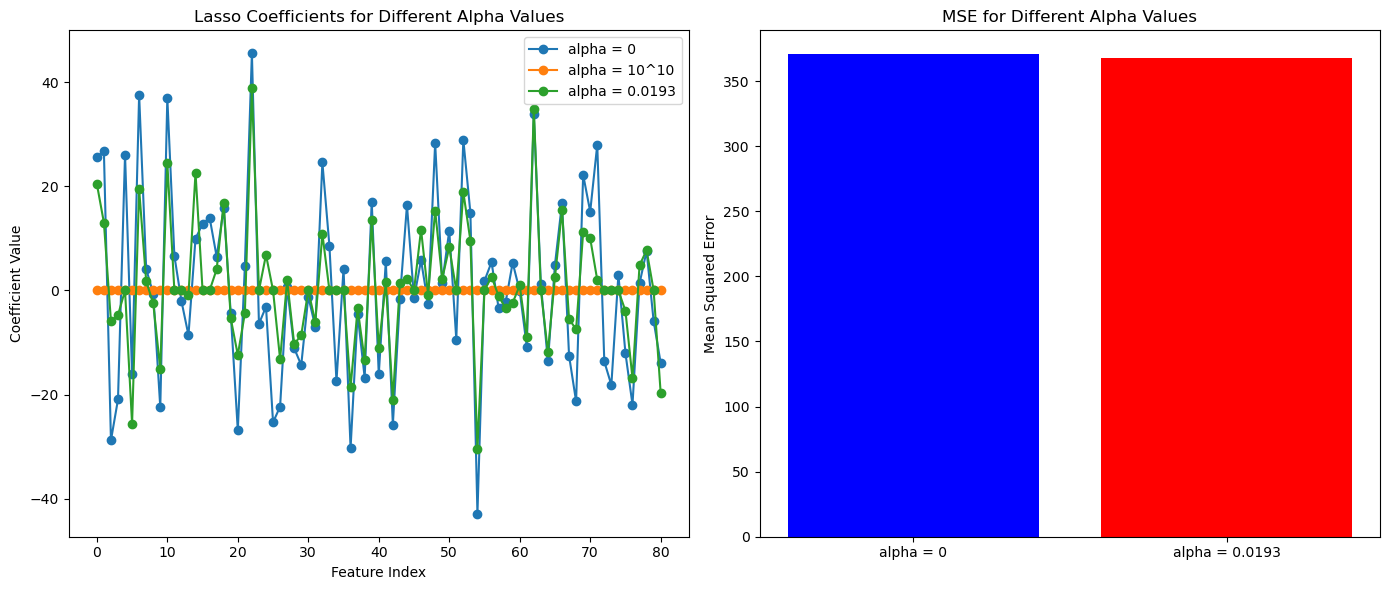

In [23]:

# Plot the coefficients
# Fit lasso regression models with the best alpha, alpha = 0,  and alpha = 10^10
lasso1 = Lasso(alpha=0)
lasso1.fit(X_train_scaled, y_train)
pred1 = lasso1.predict(X_test_scaled)
mse1 = mean_squared_error(y_test, pred1)

lasso2 = Lasso(alpha=10**10)
lasso2.fit(X_train_scaled, y_train)
pred2 = lasso2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, pred2)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lasso1.coef_, marker='o', label='alpha = 0')
plt.plot(lasso2.coef_, marker='o', label='alpha = 10^10')

plt.plot(lasso_best.coef_, marker='o', label=f'alpha = {best_alpha:.4f}')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.legend()

# Plot the MSE
mse_values = [mse1, mse_best]
alpha_labels = ['alpha = 0' ,f'alpha = {best_alpha:.4f}']

plt.subplot(1, 2, 2)
plt.bar(alpha_labels, mse_values, color=['blue',  'red'])
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Alpha Values')

plt.tight_layout()
plt.show()


In [24]:
# Predict on both training and testing datasets
train_pred_best = lasso_best.predict(X_train_scaled)
test_pred_best = lasso_best.predict(X_test_scaled)

# Calculate MSE and R-squared for training data
mse_train_best = mean_squared_error(y_train, train_pred_best)
r2_train_best = r2_score(y_train, train_pred_best)

# Calculate MSE and R-squared for testing data
mse_test_best = mean_squared_error(y_test, test_pred_best)
r2_test_best = r2_score(y_test, test_pred_best)
 
print(f"Training MSE for best alpha ({best_alpha}): {mse_train_best:.4f}")
print(f"Training R-squared for best alpha ({best_alpha}): {r2_train_best:.4f}")
print(f"Testing MSE for best alpha ({best_alpha}): {mse_test_best:.4f}")
print(f"Testing R-squared for best alpha ({best_alpha}): {r2_test_best:.4f}")


Training MSE for best alpha (0.019306977288832496): 339.9008
Training R-squared for best alpha (0.019306977288832496): 0.6494
Testing MSE for best alpha (0.019306977288832496): 367.4490
Testing R-squared for best alpha (0.019306977288832496): 0.6013


In [25]:
rs_test_l.append(r2_test_best)
rs_tr_l.append(r2_train_best)
mse_tr_l.append(mse_train_best)
mse_test_l.append(mse_test_best)

## PLS

In [26]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [27]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 82)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_train_scaled, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [28]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

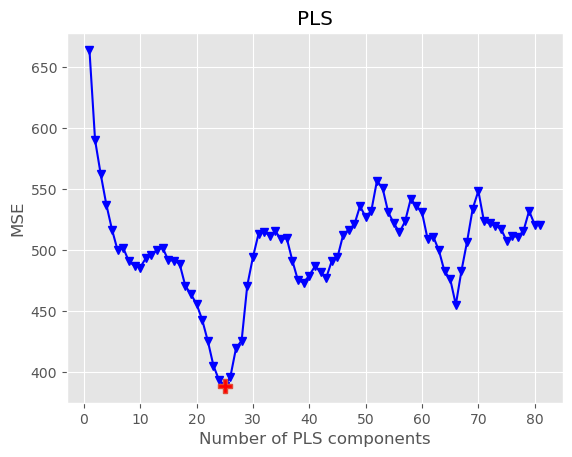

In [29]:
plot_metrics(mses, 'MSE', 'min')

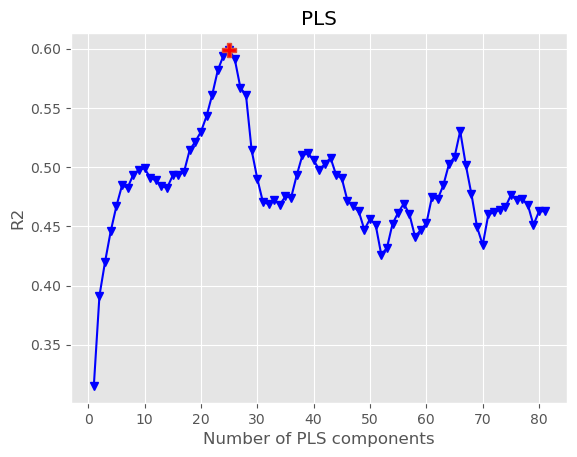

In [30]:
plot_metrics(r2s, 'R2', 'max')

In [31]:
##### y_cv, r2, mse, rpd = optimise_pls_cv(X_train_scaled, y_train, 33)

In [32]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.4627, MSE: 520.9978, RPD: 1.3647


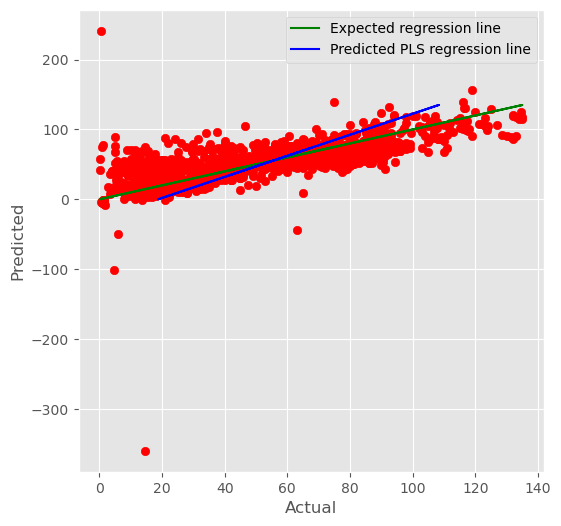

In [33]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_train, y_cv, color='red')
    plt.plot(y_train, y_train, '-g', label='Expected regression line')
    z = np.polyfit(y_train, y_cv, 1)
    plt.plot(np.polyval(z, y_train), y_train, color='blue', label='Predicted PLS regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [34]:
# Initialize and fit the PLS model
pls = PLSRegression(n_components=25)

pls.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = pls.predict(X_train_scaled)

# Predict on test data
y_test_pred = pls.predict(X_test_scaled)

# Calculate R^2 and MSE for training data
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate R^2 and MSE for test data
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f'Training R^2: {r2_train:.4f}')
print(f'Training MSE: {mse_train:.4f}')
print(f'Test R^2: {r2_test:.4f}')
print(f'Test MSE: {mse_test:.4f}')

Training R^2: 0.6427
Training MSE: 346.4475
Test R^2: 0.5849
Test MSE: 382.5890


In [35]:
rs_test_l.append(r2_test)
rs_tr_l.append(r2_train)
mse_tr_l.append(mse_train)
mse_test_l.append(mse_test)

## PCA

In [36]:
from sklearn.decomposition import PCA


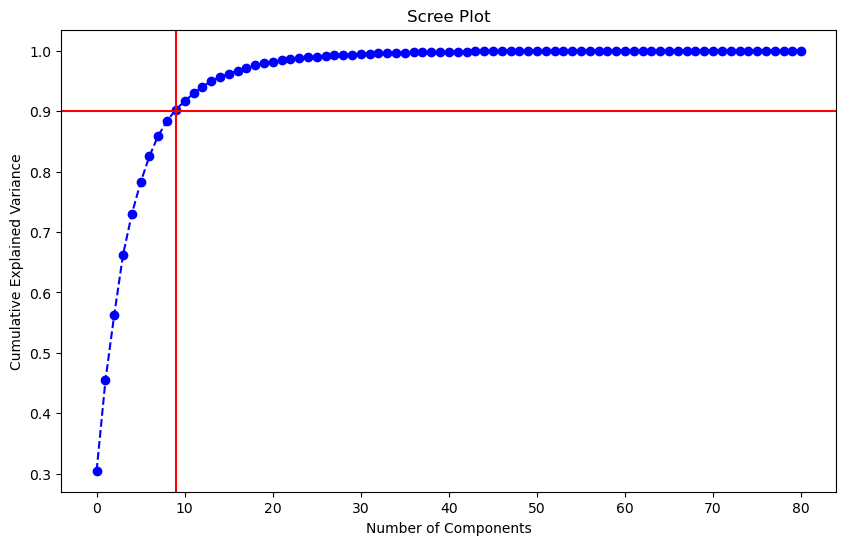

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# In[8]:

# Apply PCA and fit it on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=np.argmax(np.cumsum(explained_variance) >= 0.90) , color='r', linestyle='-')
plt.show()


In [38]:
# Determine the number of components that explain 80% of the variance
n_components_80 = np.argmax(np.cumsum(explained_variance) >= 0.90) 
print(f"Number of components explaining 80% of the variance: {n_components_80}")


Number of components explaining 80% of the variance: 9


Train MSE: 596.5759525457045, Train R2: 0.38470610016201856
Test MSE: 564.0060281539949, Test R2: 0.3879963361433181


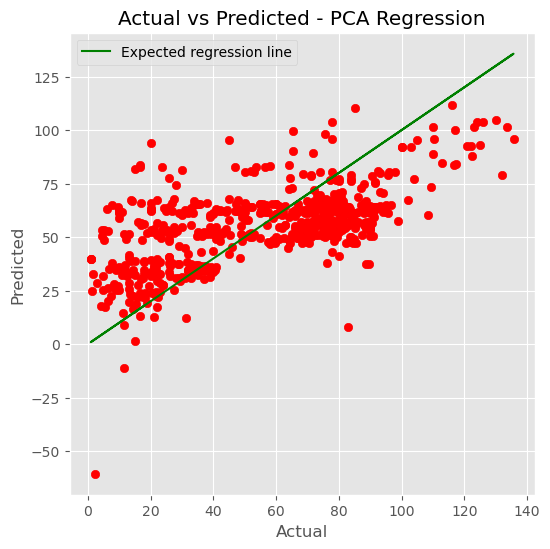

In [39]:
# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# In[9]:

# Apply linear regression on PCA-transformed data
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

# Predictions
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Train R2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R2: {test_r2}')

# In[10]:

# Plotting actual vs predicted
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_test_pred, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted - PCA Regression')
    plt.legend()
    plt.show()


In [40]:
rs_test_l.append(test_r2)
rs_tr_l.append(train_r2)
mse_tr_l.append(train_mse)
mse_test_l.append(test_mse)
rs_test_l = [round(num, 3) for num in rs_test_l]
rs_tr_l = [round(num, 3) for num in rs_tr_l]
mse_tr_l = [round(num, 3) for num in mse_tr_l]
mse_test_l = [round(num, 3) for num in mse_test_l]

In [41]:
print(mse_test_l)


[351.377, 238.426, 363.994, 367.449, 382.589, 564.006]


TypeError: 'numpy.ndarray' object is not callable

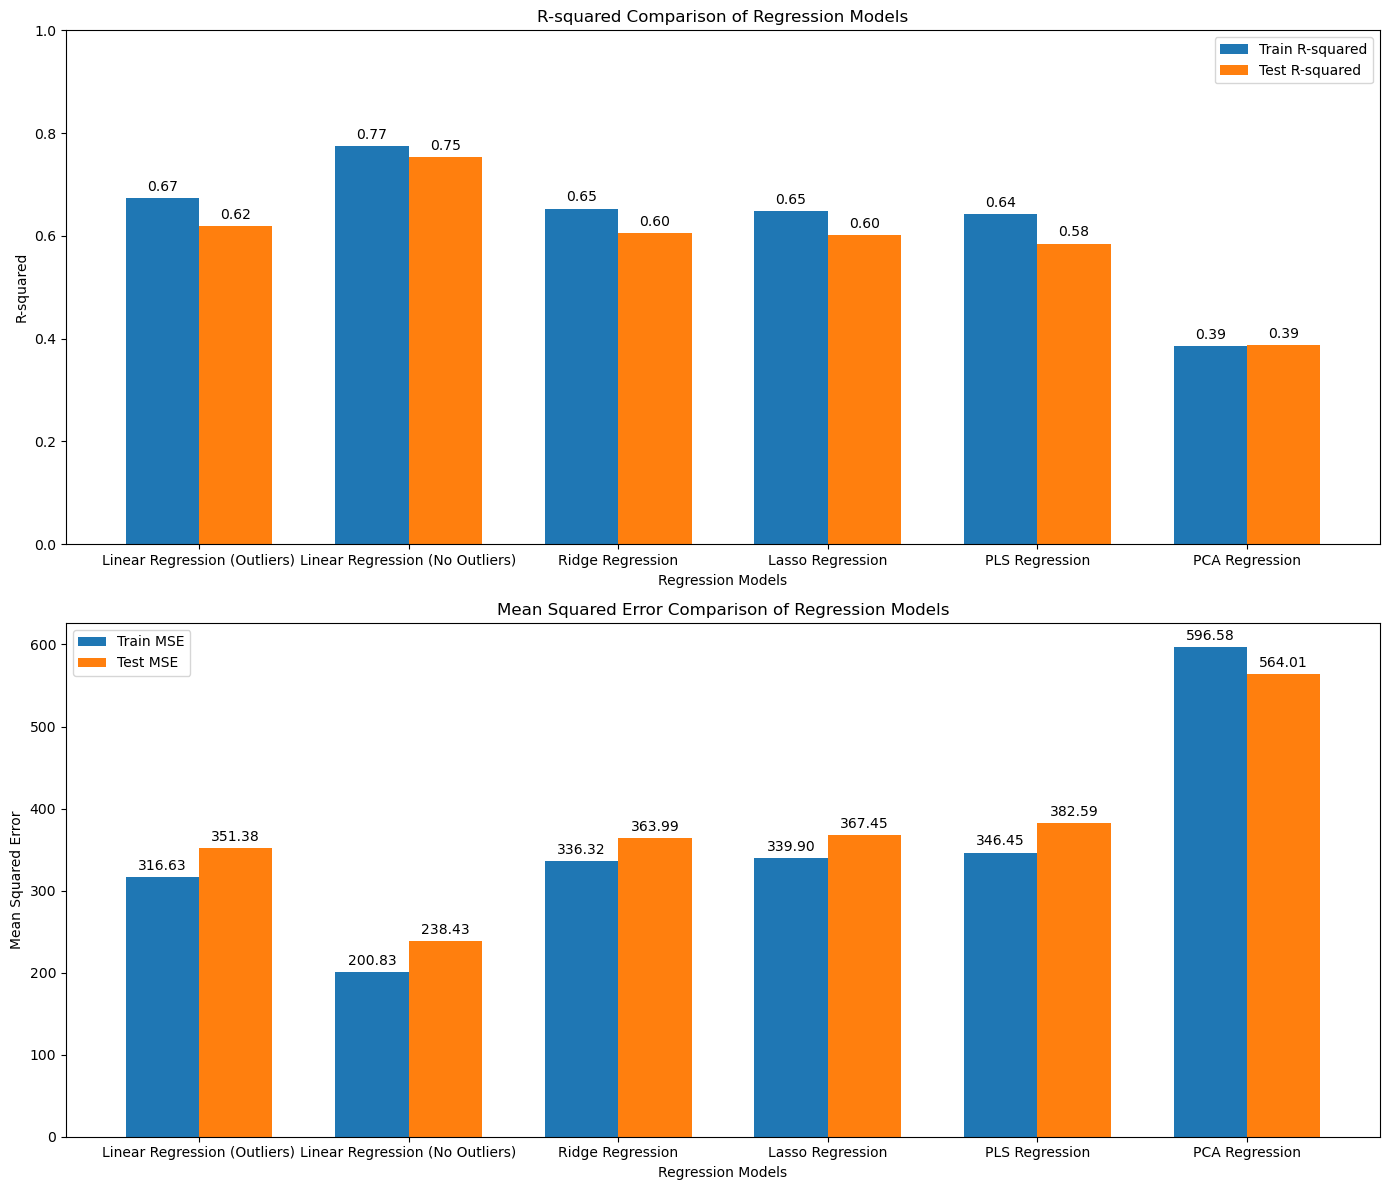

In [42]:
models = [
    'Linear Regression (Outliers)',
    'Linear Regression (No Outliers)',
    'Ridge Regression',
    'Lasso Regression',
    'PLS Regression',
    'PCA Regression'
]
# Plotting R-squared values
x = np.arange(len(mse_tr_l))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plot R-squared values
rects1 = ax[0].bar(x - width/2, rs_tr_l, width, label='Train R-squared')
rects2 = ax[0].bar(x + width/2, rs_test_l, width, label='Test R-squared')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax[0].set_xlabel('Regression Models')
ax[0].set_ylabel('R-squared')
ax[0].set_title('R-squared Comparison of Regression Models')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
ax[0].set_ylim(0, 1)  # R-squared ranges from 0 to 1

# Plot MSE values
rects3 = ax[1].bar(x - width/2, mse_tr_l, width, label='Train MSE')
rects4 = ax[1].bar(x + width/2, mse_test_l, width, label='Test MSE')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax[1].set_xlabel('Regression Models')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Mean Squared Error Comparison of Regression Models')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# Function to add labels on top of the bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the label function to each set of bars
autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])
autolabel(rects4, ax[1])

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

In [ ]:


from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

def remove_outliers(X, y, threshold=3.0):
    pls = PLSRegression(n_components=min(X.shape[1], 10))
    pls.fit(X, y)
    residuals = y - pls.predict(X).ravel()
    std_residuals = np.std(residuals)
    mask = np.abs(residuals) < threshold * std_residuals
    return X[mask], y[mask]

# Remove outliers from the training data
X_train_cleaned, y_train_cleaned = remove_outliers(X_train_scaled, y_train)

# Evaluate PLS with cross-validation
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 82)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_train_cleaned, y_train_cleaned, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

# Plot the metrics
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective == 'min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')
    plt.show()

# Plot MSE
plot_metrics(mses, 'Mean Squared Error', 'min')

# Plot R2
plot_metrics(r2s, 'R-squared', 'max')

# Initialize and fit the PLS model
pls = PLSRegression(n_components=50)
pls.fit(X_train_cleaned, y_train_cleaned)

# Predict on training data
y_train_pred = pls.predict(X_train_cleaned)

# Predict on test data
y_test_pred = pls.predict(X_test_scaled)

# Calculate R^2 and MSE for training data
r2_train = r2_score(y_train_cleaned, y_train_pred)
mse_train = mean_squared_error(y_train_cleaned, y_train_pred)

# Calculate R^2 and MSE for test data
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print(f'Training R^2: {r2_train:.4f}')
print(f'Training MSE: {mse_train:.4f}')
print(f'Test R^2: {r2_test:.4f}')
print(f'Test MSE: {mse_test:.4f}')

# Plot actual vs predicted for training data
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_train_cleaned, y_train_pred, color='red')
    plt.plot(y_train_cleaned, y_train_cleaned, '-g', label='Expected regression line')
    z = np.polyfit(y_train_cleaned, y_train_pred.ravel(), 1)
    plt.plot(y_train_cleaned, np.polyval(z, y_train_cleaned), color='blue', label='Predicted PLS regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()